# Feature Engineering Geospatial Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [3]:
sale_data = pd.read_csv('data_available/sale_data_post_C&W.csv', sep=',')
sale_data.shape

(10448, 14)

In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daft_id          10448 non-null  int64  
 1   url              10448 non-null  object 
 2   name             10448 non-null  object 
 3   price            10448 non-null  float64
 4   sale_type        10448 non-null  object 
 5   floor_area       10448 non-null  int64  
 6   entered_renewed  10448 non-null  object 
 7   views            10448 non-null  float64
 8   type             10448 non-null  object 
 9   scraping_date    10448 non-null  object 
 10  latitude         10448 non-null  float64
 11  longitude        10448 non-null  float64
 12  bedroom          10448 non-null  object 
 13  bathroom         10448 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


- `latitude`
- `longitude`

### Geopandas

In [5]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def do_geocode(geolocator, lat, lon, attempt=1, max_attempts=10):
    try:
        return geolocator.reverse(f"{lat}, {lon}")
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(geolocator, lat, lon, attempt=attempt+1)
        else: # raise
            print('!!!!!!!!!!!!!')
            return np.nan


def location_features(df, attempt=1, max_attempts=5): ## this is so slow
    
    lat_series = df['latitude']
    lon_series = df['latitude']
    
    geolocator = Nominatim(user_agent="my_geocoder")
    location_dict = {'country_code': [], 
                    'country': [], 
                    'postcode': [], 
                    'state_district': [], 
                    'county': [], 
                    'municipality': [], 
                    'city': [], 
                    'town': [], 
                    'city_district': [], 
                    'locality': [], 
                    'road': [], 
                    'house_number': []}
    
    for i, coordinates in enumerate(zip(lat_series, lon_series)):
        lat = coordinates[0]
        lon = coordinates[1]
        
        time.sleep(1) # sleeps for 1 second
        
        try:
            #location = geolocator.reverse(f"{lat}, {lon}")
            location = do_geocode(geolocator, lat, lon, attempt=1, max_attempts=5)
        except: continue
            #location = 
 
            
        for key in location_dict:
            try:
                location_dict[key].append(location.raw['address'][key])
            except:
                location_dict[key].append(np.nan)
        
            
        
        if i in range(0, df.shape[0], 100):
            print(i)
        
            
    return location_dict 

In [6]:
def location_dataframe(df, dictionary):

    print(df.shape)
    for key in dictionary:
        df[key] = dictionary[key]
    print(df.shape)
    return df

In [7]:
def location_engineering(df):
    location_dict = location_features(df)
    df = location_dataframe(df, location_dict)
    return df

In [14]:
#sale_data = location_engineering(sale_data)

In [ ]:
sale_dict = location_features(sale_data)

In [15]:
print(sale_data.shape)
for key in sale_dict:
    sale_data[key] = sale_dict[key]
print(sale_data.shape)

(10448, 14)


NameError: name 'sale_dict' is not defined

In [11]:
sale_data.to_csv('data_available/sale_data_post_loc_eng.csv', sep=',', index=False)

In [12]:
sale_data = pd.read_csv('data_available/sale_data_post_loc_eng.csv', sep=',')
sale_data.shape

(10448, 14)

In [13]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daft_id          10448 non-null  int64  
 1   url              10448 non-null  object 
 2   name             10448 non-null  object 
 3   price            10448 non-null  float64
 4   sale_type        10448 non-null  object 
 5   floor_area       10448 non-null  int64  
 6   entered_renewed  10448 non-null  object 
 7   views            10448 non-null  float64
 8   type             10448 non-null  object 
 9   scraping_date    10448 non-null  object 
 10  latitude         10448 non-null  float64
 11  longitude        10448 non-null  float64
 12  bedroom          10448 non-null  object 
 13  bathroom         10448 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


### Reverse-Geocode

In [ ]:
import reverse_geocode

In [ ]:
coordinates = (54.276114, -8.506455), (54.276114, -8.506455)
reverse_geocode.search(coordinates)

### Polar Coordinates

In [53]:
# Converting Cartesian Coordinate to Polar Coordinate
# Importing math library
import math

# Reading cartesian coordinate
x = sale_data['latitude']
y = sale_data['longitude']

# Converting cartesian to polar coordinate
# Calculating radius
#radius = math.sqrt( x * x + y * y )
radius = ((x * x) + (y * y)) ** (1 / 2)
# Calculating angle (theta) in radian
theta = np.arctan(y / x)
# Converting theta from radian to degree
theta = 180 * theta / math.pi

# Displaying polar coordinates
#print('Polar coordinate is: (radius = %0.2f,theta = %0.2f)' %(radius, theta))

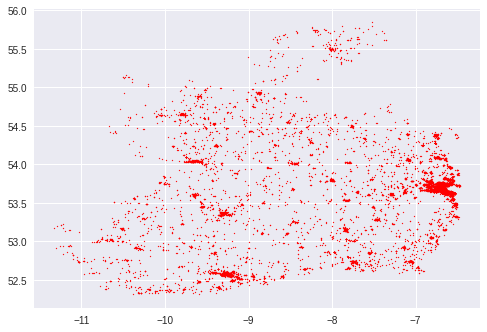

In [61]:
plt.scatter(theta, radius, color='red', s=1);#alpha=0.1

### Rotational Cartesian Coordinates

In [62]:
def rotation(df):
    rot_45_x = (0.707 * df['latitude']) + (0.707 * df['longitude'])
    rot_45_y = (0.707 * df['longitude']) + (0.707 * df['latitude'])
    rot_30_x = (0.866 * df['latitude']) + (0.5 * df['longitude'])
    rot_30_y = (0.866 * df['longitude']) + (0.5 * df['latitude'])
    return rot_45_x, rot_45_y, rot_30_x, rot_30_y

In [63]:
rot_45_x, rot_45_y, rot_30_x, rot_30_y = rotation(sale_data)

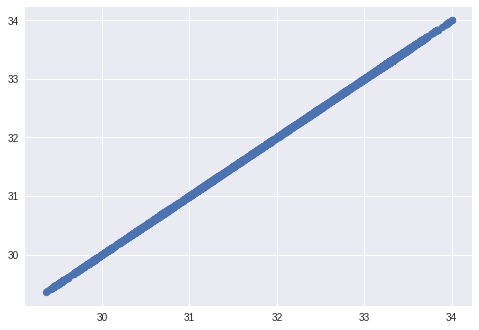

In [64]:
plt.scatter(rot_45_x, rot_45_y);

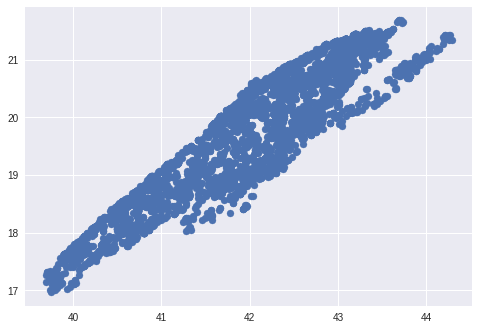

In [65]:
plt.scatter(rot_30_x, rot_30_y);

### Haversine Distance

In [66]:
def haversine_dist(lat1,lng1,lat2,lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    radius = 6371  # Earth's radius taken from google
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

### Manhattan Distance

In [67]:
def manhattan_dist(lat1, lng1, lat2, lng2):
    '''
    calculating two haversine distances by,
     - avoiding Latitude of one point 
     - avoiding Longitude of one point
    and adding it together.
    '''
    a = haversine_dist(lat1, lng1, lat1, lng2)
    b = haversine_dist(lat1, lng1, lat2, lng1)
    return a + b

### Bearing Degree

In [68]:
def bearing_degree(lat1, lng1, lat2, lng2):
    '''
    calculate angle between two points
    '''
    radius = 6371  # Mean radius of Earth
    diff_lng = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(diff_lng) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(diff_lng)
    return np.degrees(np.arctan2(y, x))

### Rotational Coordinates using PCA

Here, the idea is only to rotate them which would help decision tree splits in typical tree-based models.

In [69]:
from sklearn.decomposition import PCA
def pca(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    coordinates = data[['x','y']].values
    pca_obj = PCA().fit(coordinates)
    pca_x = pca_obj.transform(data[['x', 'y']])[:,0]
    pca_y = pca_obj.transform(data[['x', 'y']])[:,1]
    return pca_x, pca_y

### Assing Coordinates to Different Clusters

In [70]:
from sklearn.cluster import KMeans

def cluster(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y) coordinates
    output: series of cluster labels that each row of coordinates belongs to.
    '''
    model = KMeans(n_clusters=50)
    labels = model.fit_predict(data)
    return labels

#### Visualization

In [39]:
import matplotlib.pyplot as plt
def visualize(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    plt.scatter(data['longitude'], data['latitude'], color='blue', s=1, alpha=0.1)
    #data[['longitude','latitude']].scatter(color='blue', s=1, alpha=0.1)
    plt.title('Visualization of Latitude and Longitude')
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    #plt.ylim([53.350, 53.325])
    #plt.xlim([-6.24, -6.23])
    plt.show()

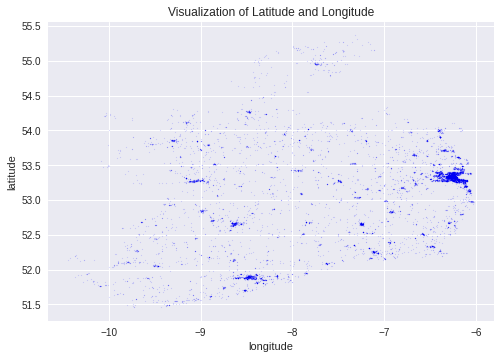

In [40]:
visualize(sale_data)